# Exploratory data analysis of Expedia Hotels dataset 

CS 267, SJSU

Anna Sinilo

Dataset includes shopping and purchase data as well as information on price competitiveness

In [66]:
%pylab inline
import seaborn as sns
import pandas as pd
matplotlib.pyplot.style.use = 'default'
from scipy.stats import gaussian_kde

Populating the interactive namespace from numpy and matplotlib


# Load data

In [36]:
test = pd.read_csv("test.csv")

In [37]:
train = pd.read_csv("train.csv")

# Check dimensionality

In [24]:
print "test dimensionality:", test.shape
print "test head:"
test.head()

test dimensionality: (6622629, 50)
test head:


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,3105,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,6399,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,7374,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,7771,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,12938,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
print "train dimensionality:", train.shape
print "train head:"
train.head()

train dimensionality: (9917530, 54)
train head:


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


# Variables

Variables in train: 

In [70]:
print list(train.columns.values), len(list(train.columns.values))

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

Variables in test:

In [164]:
print list(test.columns.values), len(list(test.columns.values))

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'] 50


Train contains 4 additional features: 'position', 'click_bool', 'gross_bookings_usd', 'booking_bool'

# Count the number and % of NA values

In [62]:
(1.0 - train.count() / len(train)) * 100.0

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.905012
visitor_hist_adr_usd           94.881669
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.147517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.964945
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

In [61]:
(1.0 - test.count() / len(test)) * 100.0

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.858900
visitor_hist_adr_usd           94.828172
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.144187
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.968949
prop_log_historical_price       0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affinity_score      93.577415
orig_destination

Missing values in training and testing sets are distributed similarly.

# Basic feature exploration

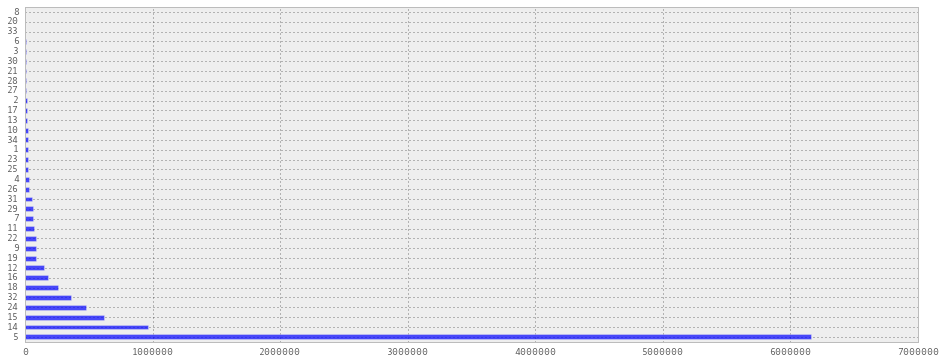

In [92]:
train['site_id'].value_counts().plot(kind='barh', color="blue", alpha=.7, figsize=(16, 6))

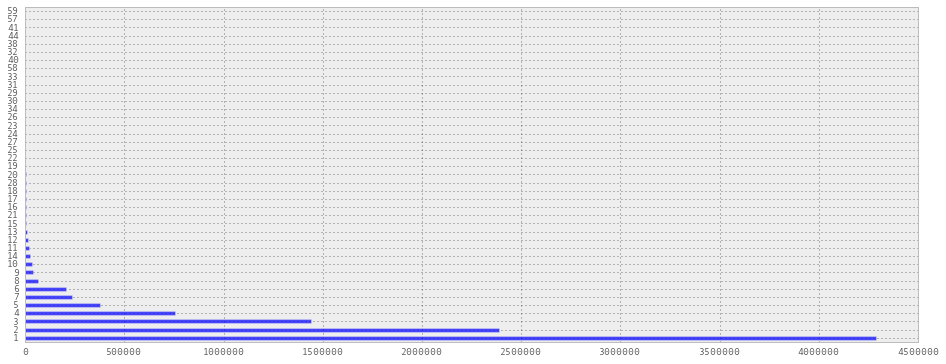

In [91]:
train['srch_length_of_stay'].value_counts().plot(kind='barh', color="blue", alpha=.7, figsize=(16, 6))

In [101]:
print train['date_time'].head(10), train['date_time'].tail(10)

0    2013-04-04 08:32:15
1    2013-04-04 08:32:15
2    2013-04-04 08:32:15
3    2013-04-04 08:32:15
4    2013-04-04 08:32:15
5    2013-04-04 08:32:15
6    2013-04-04 08:32:15
7    2013-04-04 08:32:15
8    2013-04-04 08:32:15
9    2013-04-04 08:32:15
Name: date_time, dtype: object 9917520    2013-03-30 16:39:40
9917521    2013-03-30 16:39:40
9917522    2013-03-30 16:39:40
9917523    2013-05-21 11:06:37
9917524    2013-05-21 11:06:37
9917525    2013-05-21 11:06:37
9917526    2013-05-21 11:06:37
9917527    2013-05-21 11:06:37
9917528    2013-05-21 11:06:37
9917529    2013-05-21 11:06:37
Name: date_time, dtype: object


In [102]:
print test['date_time'].head(10), test['date_time'].tail(10)

0    2012-11-05 21:28:38
1    2012-11-05 21:28:38
2    2012-11-05 21:28:38
3    2012-11-05 21:28:38
4    2012-11-05 21:28:38
5    2012-11-05 21:28:38
6    2012-11-05 21:28:38
7    2012-11-05 21:28:38
8    2012-11-05 21:28:38
9    2012-11-05 21:28:38
Name: date_time, dtype: object 6622619    2013-06-23 23:53:49
6622620    2013-06-23 23:53:49
6622621    2013-06-23 23:53:49
6622622    2013-06-23 23:53:49
6622623    2013-06-23 23:53:49
6622624    2013-06-23 23:53:49
6622625    2013-06-23 23:53:49
6622626    2013-06-23 23:53:49
6622627    2013-06-23 23:53:49
6622628    2013-06-23 23:53:49
Name: date_time, dtype: object


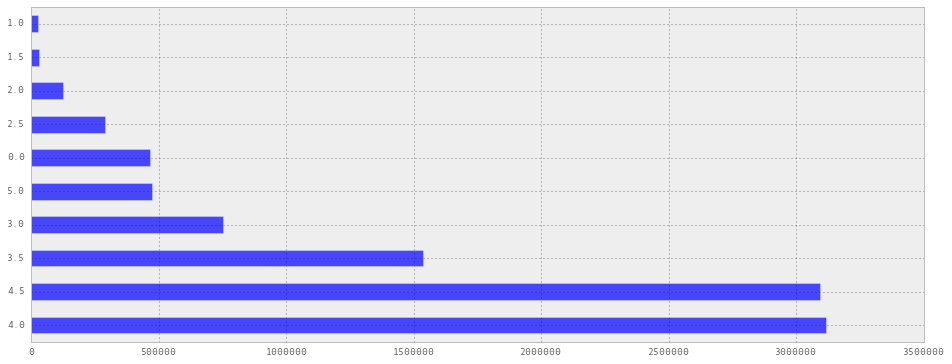

In [110]:
train["prop_review_score"].value_counts().plot(kind='barh', color="blue", alpha=.7, figsize=(16, 6))

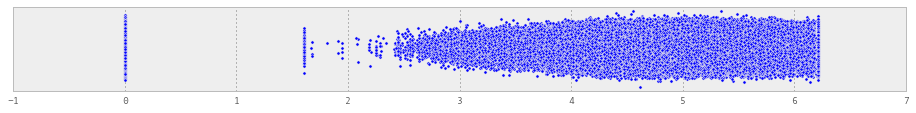

In [126]:
figure(figsize=(16, 1.5)), grid(True, axis='x'), yticks([])
scatter(train['prop_log_historical_price'], randn(len(train['prop_log_historical_price'])), s=10)
plt.show()

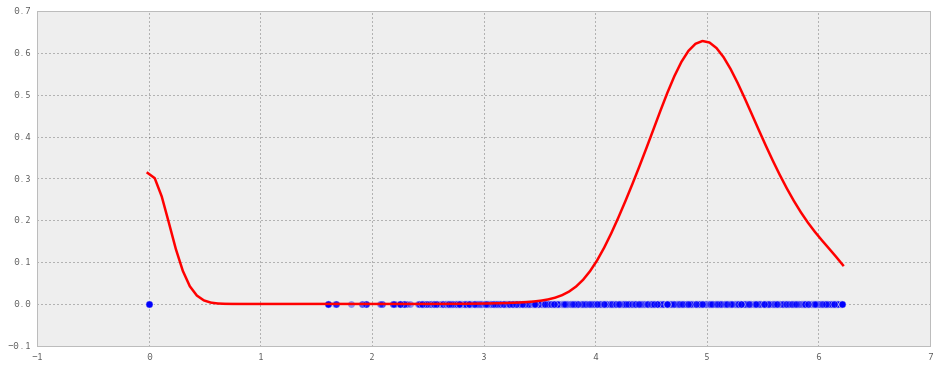

In [152]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(16, 6))
density = gaussian_kde(train['prop_log_historical_price'], bw_method=0.1)
xs = linspace(min(train['prop_log_historical_price'])-0.01, max(train['prop_log_historical_price'])+0.01, 100)
plt.plot(xs, density(xs), linewidth=2.5, color='red')
scatter(train['prop_log_historical_price'], zeros(len(train['prop_log_historical_price'])), s=50, alpha=0.4)
plt.ylim(-0.1, 0.7)
plt.show()

What happens if we eliminate all rows with missing values?

In [166]:
new_train = train.dropna()
new_train.shape

(0, 54)

Count number of distinct queries

In [12]:
print len(train.srch_id.unique())
print len(test.srch_id.unique())

399344
266230


Compute average number of returned items per query

In [26]:
counts_train = train.srch_id.value_counts()
print round(1.0 * sum(counts_train) / len(counts_train), 2)
counts_test = test.srch_id.value_counts()
print round(1.0 * sum(counts_test) / len(counts_test), 2)

24.83
24.88


# Data Mining task

Submission format: SearchId,PropertyId

Learning to rank: within each query we need to sort property id most accurately. It means that we need to determine what factors make one hotel more relevant than another.

# Target variable

In [174]:
print train[['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']].head()

   position  click_bool  gross_bookings_usd  booking_bool
0        27           0                 NaN             0
1        26           0                 NaN             0
2        21           0                 NaN             0
3        34           0                 NaN             0
4         4           0                 NaN             0


In [175]:
print train[['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']].tail()

         position  click_bool  gross_bookings_usd  booking_bool
9917525         2           0                 NaN             0
9917526         6           1              154.34             1
9917527         8           0                 NaN             0
9917528         7           0                 NaN             0
9917529         4           0                 NaN             0


# Correlations

In [68]:
numeric_variables = train[['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 
                           'prop_location_score1','prop_location_score2', 'prop_log_historical_price', 
                           'price_usd', 'srch_query_affinity_score','orig_destination_distance', 
                           'comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff',
                           'comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff',
                           'comp7_rate_percent_diff','comp8_rate_percent_diff','gross_bookings_usd','position']]

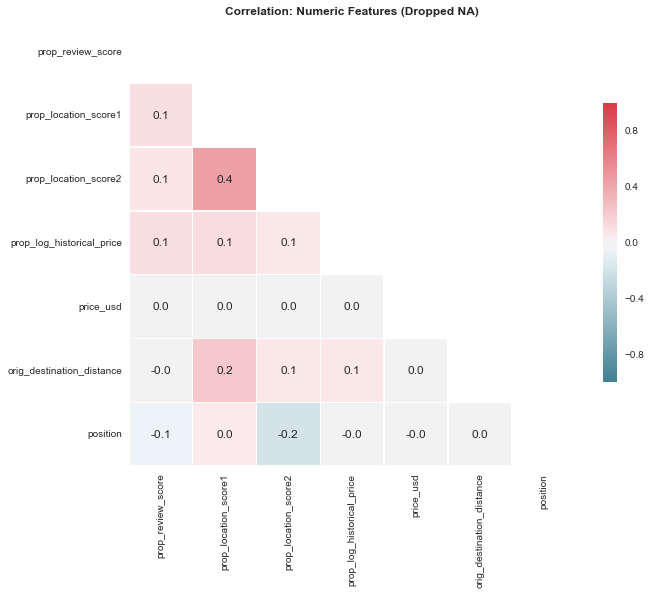

In [73]:
sns.set(style="white")
d = train[['prop_review_score', 'prop_location_score1','prop_location_score2', 'prop_log_historical_price', 
           'price_usd','orig_destination_distance','position']].dropna()
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Correlation: Numeric Features (Dropped NA)', fontweight="bold")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt='.1f', 
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation='vertical')
plt.show()